In [2]:
!pip install llama-index
!pip install openai
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.3 MB/s eta 0:00:0031m33.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.4/187.4 kB 12.2 MB/s eta 0:00:00


In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

openai_api_key_var = os.getenv('OPENAI_API_KEY')


In [3]:
from langchain_openai.chat_models import ChatOpenAI

model = ChatOpenAI(openai_api_key = openai_api_key_var, model = "gpt-4o-mini")

In [4]:
model.invoke("how are you?")

AIMessage(content="I'm just a program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 11, 'total_tokens': 38, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_1bb46167f9', 'finish_reason': 'stop', 'logprobs': None}, id='run-2d620af1-d86d-4f23-8d9b-00567514c3bc-0', usage_metadata={'input_tokens': 11, 'output_tokens': 27, 'total_tokens': 38})

In [5]:
from langchain_community.document_loaders import UnstructuredPDFLoader
from langchain_community.document_loaders import OnlinePDFLoader
from langchain.document_loaders.pdf import PyPDFDirectoryLoader

In [6]:
def load_documents():
    document_loader = PyPDFDirectoryLoader('TutorAI_Data/')
    return document_loader.load()

In [8]:
pdf_documents = load_documents()

Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 14 0 (offset 0)
Ignoring wrong pointing object 22 0 (offset 0)
Ignoring wrong pointing object 28 0 (offset 0)
Ignoring wrong pointing object 34 0 (offset 0)
Ignoring wrong pointing object 36 0 (offset 0)
Ignoring wrong pointing object 42 0 (offset 0)
Ignoring wrong pointing object 65 0 (offset 0)
Ignoring wrong pointing object 67 0 (offset 0)
Ignoring wrong pointing object 73 0 (offset 0)
Ignoring wrong pointing object 79 0 (offset 0)
Ignoring wrong pointing object 81 0 (offset 0)
Ignoring wrong pointing object 87 0 (offset 0)
Ignoring wrong pointing object 89 0 (offset 0)
Ignoring wrong pointing object 103 0 (offset 0)
Ignoring wrong pointing object 105 0 (offset 0)
Ignoring wrong pointing object 107 0 (offset 0)
Ignoring wrong pointing object 118 0 (offset 0)
Ignoring wrong pointing object 120 0 (offset 0)
Ignoring 

In [90]:
print(pdf_documents[600])

page_content='CHAPTER 1 / AI: HISTORY AND APPLICATIONS 29seeks to build intelligent programs using models that parallel the structure of neurons in
the human brain or the evolving patterns found in genetic algorithms and artiﬁcial life.
A simple schematic of a neuron (Figure 1.2) consists of a cell body that has a number
of branched protrusions, called dendrites , and a single branch called the axon . Dendrites
receive signals from other neurons. When these combined impulses exceed a certainthreshold, the neuron ﬁres and an impulse, or spike , passes down the axon. Branches at the
end of the axon form synapses with the dendrites of other neurons. The synapse is the
point of contact between neurons; synapses may be either excitatory orinhibitory , either
adding to the total of signals reaching the neuron or subtracting from that total. 
This description of a neuron is excessively simple, but it captures those features that
are relevant to neural models of computation. In particular, eac

In [82]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 2000, chunk_overlap = 300)
chunks = text_splitter.split_documents(pdf_documents)


In [74]:
print(chunks[50])

page_content='*Real DOMDOMstandsfor“DocumentObjectModel”TheDOMinsimplewordsrepresentstheUIofyourapplication.WhatmakesDOMmanipulationslow?TheDOMisrepresentedasatreedatastructure.Becauseofthat,thechangesandupdatestotheDOMarefast.Butafterthechange,theupdatedelementandit’schildrenhavetobere-renderedtoupdatetheapplicationUI.There-renderingorre-paintingoftheUIiswhatmakesitslow.
51' metadata={'source': 'TutorAI_Data/20OE0003 - 5.1. Introduction to ReactJS.pdf', 'page': 50}


In [101]:
# from langchain_community.vectorstores import Chroma
# from openai import OpenAI
# from langchain_openai.embeddings import OpenAIEmbeddings

# client = OpenAI()

# def get_embedding(text = pdf_documents, model="text-embedding-3-small"):
#     vector_embeddings = client.embeddings.create(input = [text], model=model).data[0].embedding
#     return vector_embeddings


In [83]:
from langchain_openai.embeddings import OpenAIEmbeddings

# Initialize OpenAI Embeddings with your API key
embedding_model = OpenAIEmbeddings(openai_api_key=openai_api_key_var, model = "text-embedding-3-small")

# Embed the document chunks using the 'text-embedding-3-small' model
embeddings = embedding_model.embed_documents([chunk.page_content for chunk in chunks])

# View an example embedding
#print(embeddings[0])


# Visual Representation of Vectors

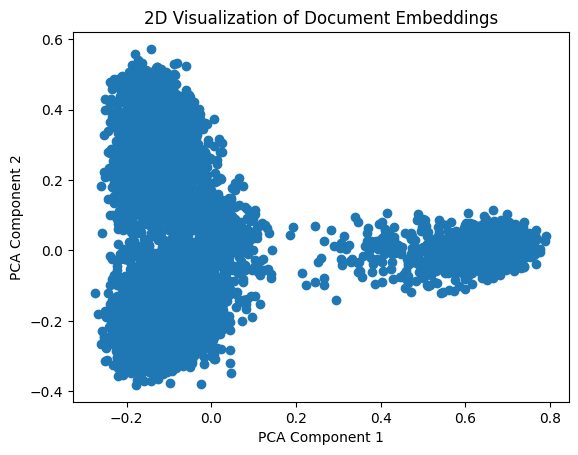

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce embeddings to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('2D Visualization of Document Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between the first two document chunks
similarity = cosine_similarity([embeddings[999]], [embeddings[1000]])
print(f"Cosine similarity between chunk 0 and chunk 1: {similarity[0][0]}")


Cosine similarity between chunk 0 and chunk 1: 0.5820671154150686


# ----------------------------------------------------------------------------------

In [84]:
from langchain.vectorstores import Chroma

vector_store = Chroma.from_documents(
    documents=chunks,  # The chunks of the documents you created earlier
    embedding=embedding_model,  # The embedding model used to generate embeddings
    persist_directory='chroma_store'  # Directory to store the persistent data
)

vector_store.persist()

In [85]:
from langchain.prompts import PromptTemplate, ChatPromptTemplate

# Create a custom prompt template
custom_prompt = PromptTemplate(
    input_variables=["question"],
    template="""You are an AI language model assistant. Your task is to generate five
    different version sof the give user quesion to retrieve relevant documents from 
    a vector database. By generating multiple perspectives on the user question, your goal is to
    help the user overcome some of the limitations of the distance-based similarity search.
    Provide these alternative questions separate by newlines.
    Original question: {question}""",
)

In [99]:
from langchain.retrievers.multi_query import MultiQueryRetriever

retriever = MultiQueryRetriever.from_llm(
    vector_store.as_retriever(),
    llm = model,
    prompt = custom_prompt
)

template = """ Answer the questions based ONLY on the following context:{context}
DO NOT use your own knowledge or any other external sources which are not provided to answer the questions.
If the answer is not present in the context provided then tell that you dont know that information.
At the end of every answer you give,  provide the resource from which you extracted the information from using this format: Document Name, Page number 
Question: {question}"""

prompt = ChatPromptTemplate.from_template(template)

In [100]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

chain = (
    {"context": retriever, 'question': RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [81]:
chain.invoke(input(""))

 what all PDF's has been given to you?


'The PDFs provided are:\n\n1. "Mastering Cloud Computing.pdf"\n2. "Cristiano-Ronaldo - the biography-PDFDrive-.pdf"\n3. "20AM3602 - M.2. Artificial Intelligence.pdf"'

In [33]:
chain.invoke(input(""))

 what all PDF's has been given to you ?


'The provided PDFs are:\n\n1. "20AM3602 - M.2. Artificial Intelligence.pdf"\n2. "Mastering_Cloud_Computing.pdf"'

In [101]:
chain.invoke(input(""))

 What is React?


'React is a JavaScript library created by Facebook, used for building UI components. It is an open-source frontend library for building user interfaces, especially for single-page applications, and it handles the view layers for web and mobile apps. React is described as a simple, feature-rich, component-based JavaScript UI library that can be used to develop both small applications and large, complex applications. \n\nDocument Name: TutorAI_Data/20OE0003 - 5.1. Introduction to ReactJS.pdf, Page number 0'